## **Dataset Example 1: Working with World University Ranking Dataset.**

### **Background:**

In this section of notebook I am trying to analyse which feature helps better rank the world's top universities. I am exploring the QS World University Rankings® 2023 based on 8 key ranking indicators.
This year’s QS World University Rankings include almost 1,500 institutions from around the world.


#### **Data Definition**

**Dataset: https://raw.githubusercontent.com/shriyapandita06/shriyapandita06/main/2023%20QS%20World%20University%20Rankings%20(1).csv**

***Understanding the data:***

**Target Variables/Dependent Variables**

- **Rank** - What is helping find the ranks of the university. This is the variable we have to predict.



**Predictor Variables/Independent Variables**

- **ar score** - Academic Reputation score

- **er score** - Employer Reputation score

- **fsr score** - Faculty Student score

- **cpf score**- Citations per faculty score

- **ifr score** - International Faculty score

- **isr score** - International Students score

- **irn score** - International Research Network score

- **ger score** - Employment Outcome score



#### **Importing necessary libraries**

In [ ]:
#Importing all the necessary libraries required
!pip install eli5
!pip install shap
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install yellowbrick

import numpy as np
import pandas as pd
import seaborn as sns
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import matplotlib.pylab as plt
from matplotlib import pyplot
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd

from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


### **Data Exploration**

In [127]:
# Reading csv file into Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/shriyapandita06/shriyapandita06/main/2023%20QS%20World%20University%20Rankings%20(1).csv')
df.head(4)

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0000,5,100.0000,4,100.0000,14,...,5,100.0000,54,90.0000,109,96.1000,58,100.0000,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0000,2,100.0000,2,100.0000,11,...,55,100.0000,60,96.3000,70,99.5000,6,100.0000,9,98.8
2,3,Stanford University,US,United States,100.0000,4,100.0000,5,100.0000,6,...,9,99.8000,74,60.3000,235,96.3000,55,100.0000,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0000,3,100.0000,3,100.0000,8,...,64,98.8000,101,98.4000,54,99.9000,3,100.0000,7,98.4


In [128]:
# Getting the dimensions of the dataframe
df.shape

(1422, 21)

In [129]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

In [130]:
# Checking for count of null values 
df.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
ar rank           0
er score          1
er rank           0
fsr score         2
fsr rank          0
cpf score         5
cpf rank          0
ifr score        98
ifr rank         98
isr score        57
isr rank         57
irn score        13
irn rank         13
ger score        12
ger rank         12
score scaled      0
dtype: int64

### **Pre-Processing**

In [131]:
# Dropping data fields not required for analysis 
df2 = df.copy()
df2.drop(columns = ['institution','location','location code','ar rank','er rank','fsr rank','cpf rank','ifr rank','isr rank','irn rank','ger rank','score scaled'], inplace = True)
df2.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0000,100.0000,100.0000,100.0000,100.0000,90.0000,96.1000,100.0000
1,2,100.0000,100.0000,100.0000,92.3000,100.0000,96.3000,99.5000,100.0000
2,3,100.0000,100.0000,100.0000,99.9000,99.8000,60.3000,96.3000,100.0000
3,4,100.0000,100.0000,100.0000,90.0000,98.8000,98.4000,99.9000,100.0000
4,5,100.0000,100.0000,99.4000,100.0000,76.9000,66.9000,100.0000,100.0000


In [132]:
# Checking for count of null values 
df2.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

In [133]:
# Creating a copy of the dataframe
newdata= df2.copy()
newdata.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0000,100.0000,100.0000,100.0000,100.0000,90.0000,96.1000,100.0000
1,2,100.0000,100.0000,100.0000,92.3000,100.0000,96.3000,99.5000,100.0000
2,3,100.0000,100.0000,100.0000,99.9000,99.8000,60.3000,96.3000,100.0000
3,4,100.0000,100.0000,100.0000,90.0000,98.8000,98.4000,99.9000,100.0000
4,5,100.0000,100.0000,99.4000,100.0000,76.9000,66.9000,100.0000,100.0000


In [134]:
# performing knn imputation to fill in the missing values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df2), columns = df2.columns)

df2.isnull().sum()

Rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

In [135]:
# Viewing top 5 rows of the dataframe
df2.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1.0000,100.0000,100.0000,100.0000,100.0000,100.0000,90.0000,96.1000,100.0000
1,2.0000,100.0000,100.0000,100.0000,92.3000,100.0000,96.3000,99.5000,100.0000
2,3.0000,100.0000,100.0000,100.0000,99.9000,99.8000,60.3000,96.3000,100.0000
3,4.0000,100.0000,100.0000,100.0000,90.0000,98.8000,98.4000,99.9000,100.0000
4,5.0000,100.0000,100.0000,99.4000,100.0000,76.9000,66.9000,100.0000,100.0000


In [136]:
# Viewing information about the dataframe features
df2.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1422.0000,1422.0000,1422.0000,1422.0000,1422.0000,1422.0000,1422.0000,1422.0000,1422.0000
mean,711.5000,20.1247,20.6509,29.9649,24.4600,30.3316,25.8088,49.3994,26.1006
std,410.6404,22.8027,24.0206,28.1658,27.8867,33.4555,30.5423,30.1445,26.1172
min,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
25%,356.2500,5.4000,4.4000,8.2000,3.1000,4.8000,3.2000,21.6250,6.8000
50%,711.5000,10.8000,10.3000,18.2000,10.9500,12.6400,10.3000,47.0000,15.5000
75%,1066.7500,23.7750,26.9500,43.4750,39.2000,49.0750,38.7000,77.3750,36.3000
max,1422.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000


**Summary Statistics**

This table shows summary statistics for a dataset with 1422 observations and 9 variables.

The variables are: 'Rank', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score' and 'ger score'.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

### **Heat Map**

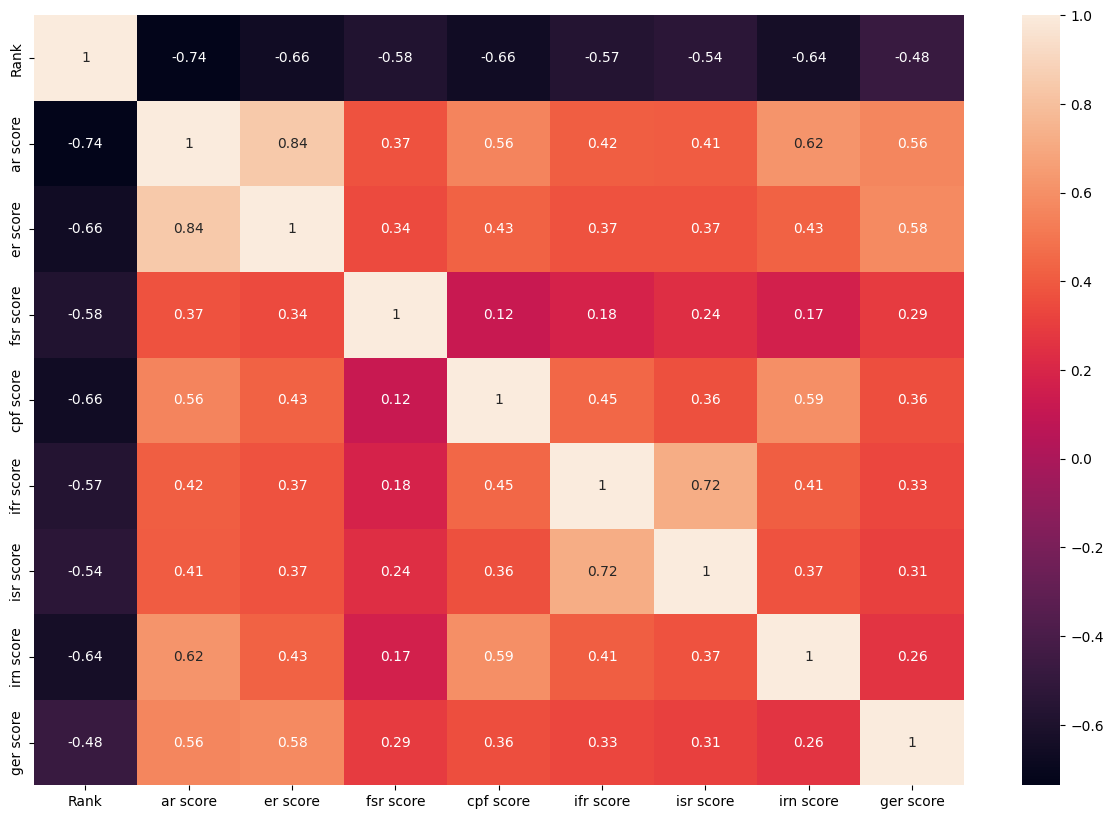

In [137]:
# Plotting the Heat Map
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True);
plt.show()

#### **Correlation Analysis**

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light orange) to high (e.g. dark purple).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.


***From the above matrix we can conclude a few things:***

* ar score and er score are highly correlated.
* ifr score and isr score are highly correlated.

### **Model**

In [138]:
# Splitting data into train and test sets
train, test = train_test_split(df2, test_size=0.2, random_state=17)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1137
No. of testing examples: 285


In [139]:
# Separating predictors and target variables for train and test sets
x_train=train.drop('Rank',axis=1)
y_train=train[['Rank']]

x_test=test.drop('Rank',axis=1)
y_test=test[['Rank']]

# Checking the shapes of the resulting dataframes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1137, 8), (1137, 1), (285, 8), (285, 1))

In [140]:
x_train.head(2)

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
241,36.1000,50.5000,21.2000,41.9000,80.6000,54.2000,85.2000,35.3000
226,7.8000,1.7000,97.7000,80.9000,38.2000,1.7000,56.9000,4.2000


In [141]:
y_train.head(2)

,Rank
241,242.0000
226,227.0000


### **Linear Regression**

In [142]:
# Fitting a linear regression model on the training data
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [143]:
# Scoring the model on the test data
lr_score = lr.score(x_test, y_test)
print(f"Linear Regression score: {lr_score}")

Linear Regression score: 0.832144866167164


In [144]:
# Predicting target variable for test data
y_pred = lr.predict(x_test)
print(f"Predicted values: {y_pred.flatten()[:5]}")
print(f"Actual values: {y_test.values.flatten()[:5]}")

Predicted values: [ 648.00068122  139.55102539  799.95364833  725.17968641 1131.82359413]
Actual values: [524. 199. 823. 428. 915.]


#### **Performance Evaluation**

In [145]:
# Evaluating the performance of the model
lr_mse = mean_squared_error(y_test.values, y_pred)
lr_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
lr_mae = mean_absolute_error(y_test.values, y_pred)
lr_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(lr_mse))
print('Score Root Mean Squared Error = {}'.format(lr_rmse))
print('Score Mean Absolute Error     = {}'.format(lr_mae))
print('Score R2                      = {}'.format(lr_r))

Score Mean Squared Error      = 29967.236882059016
Score Root Mean Squared Error = 173.11047594544652
Score Mean Absolute Error     = 143.34263198040935
Score R2                      = 0.832144866167164


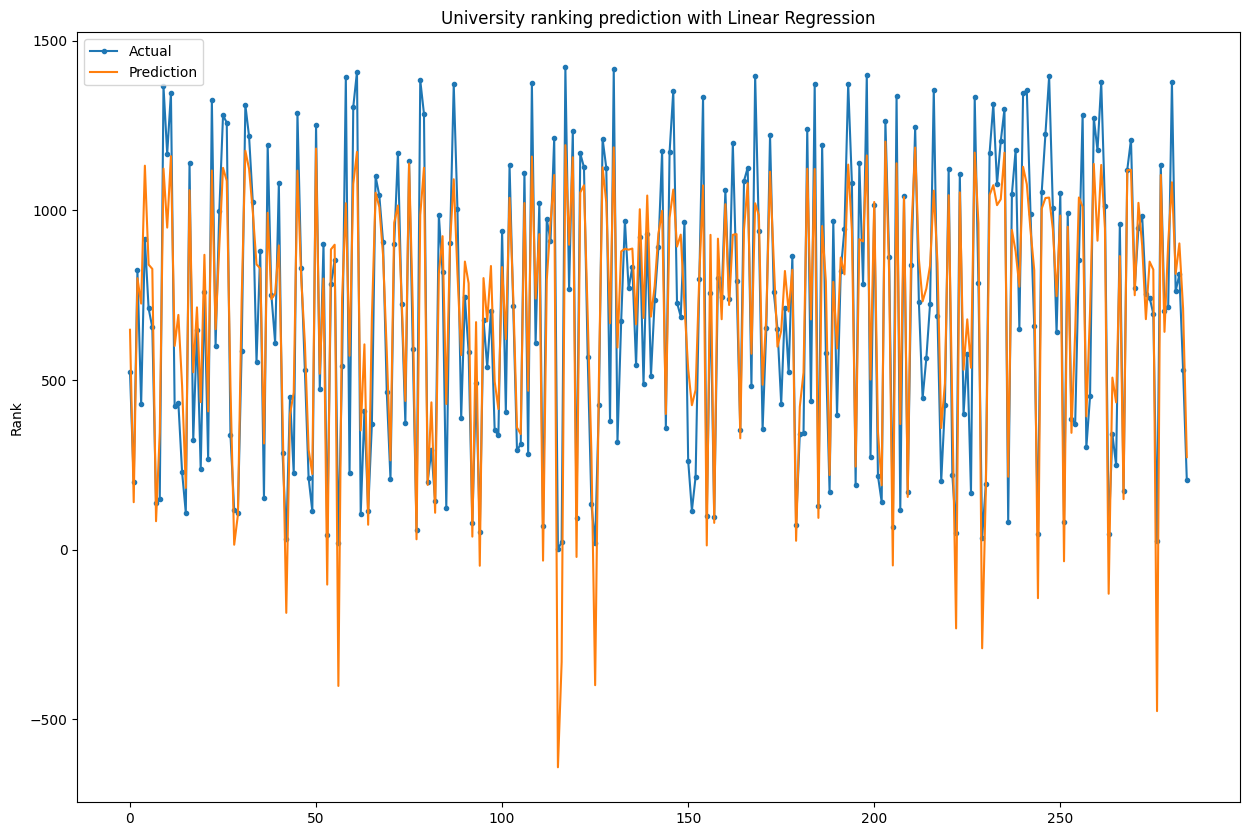

In [146]:
# Plotting actual vs predicted values
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with Linear Regression')
plt.legend()
plt.show()


In [147]:
# Creating a dataframe with actual and predicted values
prediction = pd.DataFrame()
prediction['Actual'] = y_test.values.flatten()
prediction['Linear Regression'] = y_pred.flatten()
prediction['Linear Regression'] = prediction['Linear Regression'].round(0)
prediction.head()

,Actual,Linear Regression
0,524.0000,648.0000
1,199.0000,140.0000
2,823.0000,800.0000
3,428.0000,725.0000
4,915.0000,1132.0000


In [148]:
# Adding a constant to the x_train matrix for the intercept term
X_train = sm.add_constant(x_train)


#### **OLS Regression**

In [149]:
# OLS Regression model on the training data
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     691.9
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:01:36   Log-Likelihood:                -7436.8
No. Observations:                1137   AIC:                         1.489e+04
Df Residuals:                    1128   BIC:                         1.494e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1283.8202     11.424    112.374      0.0

We will consider a significance value of 0.05 for determining the significance of our predictor variables which means if

p value is greater that 0.05 - feature is not significant for predicting the target variable
p value is less than 0.05 - feature is significant for predicting the target variable

1. The ar score has the p-value 0.141, which is more and hence it is not a significant feature.
2. The er score has the p-value 0.000, which is lesser and hence it is a significant feature.
3. The fsr score has the p-value 0.0, which is lesser and hence it is a significant feature.
4. The cpf score has the p-value 0.0, which is lesser and hence it is a significant feature.
5. The ifr score has the p-value 0.0, which is lesser and hence it is a significant feature.
6. The isr score has the p-value 0.0, which is greater and hence it is a significant feature.
7. The irn score has the p-value 0.0, which is lesser and hence it is a significant feature.
8. The ger score has the p-value 0.872, which is more and hence it is not a significant feature.



**Skew and Kurtosis**

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as 0.438, 3.430 respectively.

**Durbin-Watson**

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 1.989 which could be interpreted as a positive auto-correlation in the residuals of regression.

Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 45.123 which again re-inforces the interpretation we got from Skew and Kurtosis.

#### **Interpreting Regression Co-efficients**

In [150]:
# Predicting target variable for test data
y_pred = lr.predict(x_test)

In [151]:
# Calculating residuals
residuals = y_test.values.flatten() - y_pred.flatten()

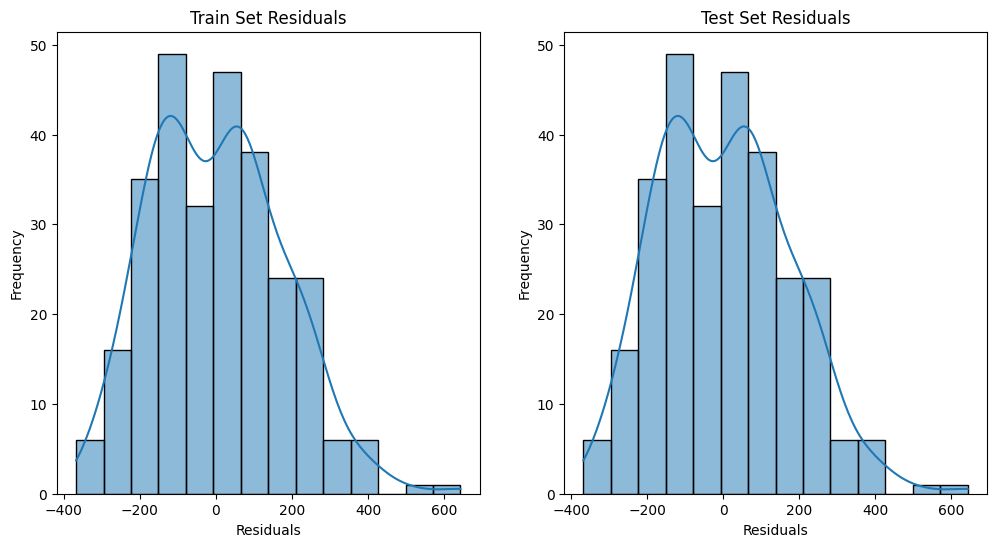

In [152]:
# Plot residuals to check for normality
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(residuals, ax=axs[0], kde=True)
sns.histplot(residuals, ax=axs[1], kde=True)
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Train Set Residuals')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Test Set Residuals')
plt.tight_layout
plt.show()

**As the shape of the graph is bell shaped and the data is normally distributed, the model is fitting well to the data.**

### **Tree-Based Model**

#### **Decision Tree**

In [153]:
# Fitting a decision tree model on the training data
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [154]:
#Finding the R-squared score of the model on the test data
dt_score = dt.score(x_test, y_test)
dt_score

0.908765488711934

In [155]:
#Performance Evaluation
y_pred = dt.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[407. 280. 803. 327. 917.]
[524. 199. 823. 428. 915.]


##### **Evaluating Performance**

In [156]:
#Finding the Scores
dt_mse = mean_squared_error(y_test.values, y_pred)
dt_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dt_mae = mean_absolute_error(y_test.values, y_pred)
dt_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(dt_mse))
print('Score Root Mean Squared Error = {}'.format(dt_rmse))
print('Score Mean Absolute Error     = {}'.format(dt_mae))
print('Score R2                      = {}'.format(dt_r))

Score Mean Squared Error      = 16288.129824561403
Score Root Mean Squared Error = 127.62495768681534
Score Mean Absolute Error     = 90.19298245614036
Score R2                      = 0.908765488711934


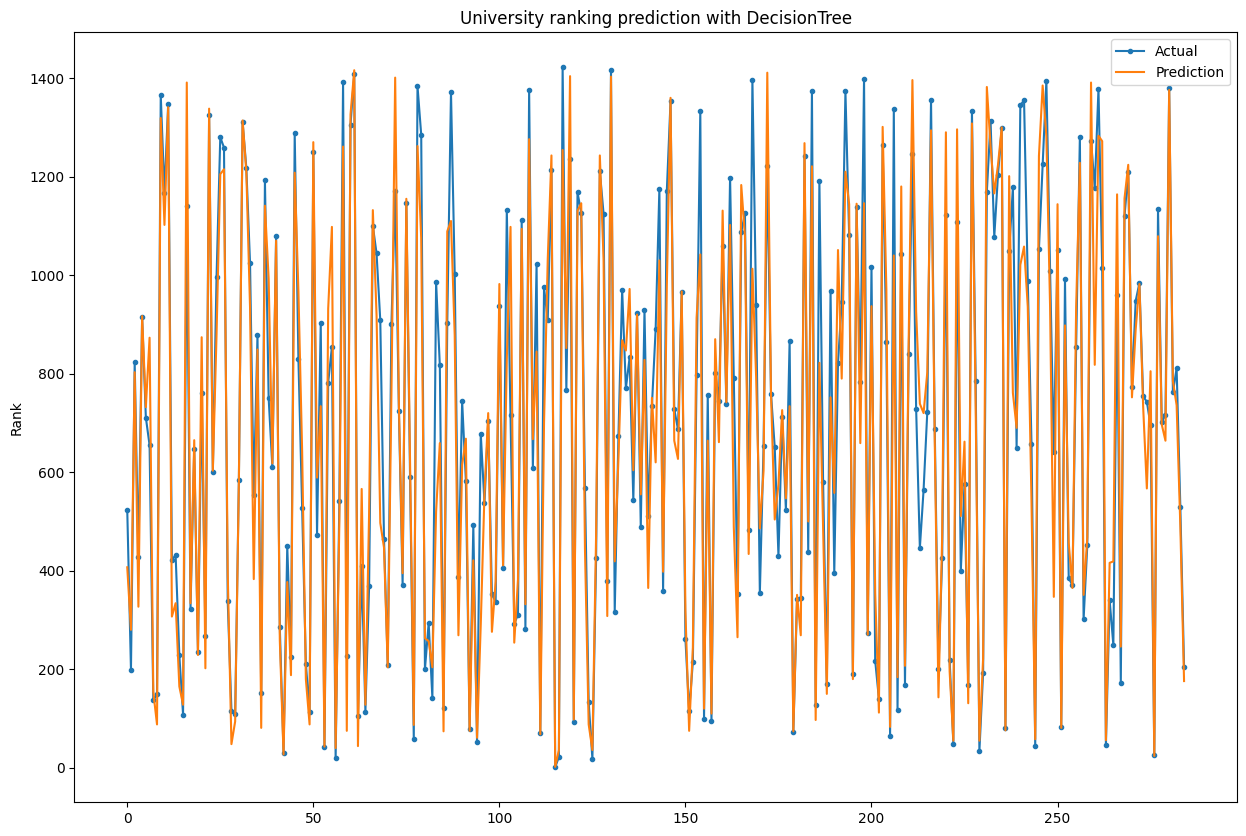

In [157]:
# Plotting actual vs predicted values
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with DecisionTree')
plt.legend()
plt.show()

In [158]:
# Comparison on the values obtained with Linear Regression and Decision Tree
prediction['DecisionTree'] = y_pred.flatten()
prediction['DecisionTree'] = prediction['DecisionTree'].round(0)
prediction.head(4) 

,Actual,Linear Regression,DecisionTree
0,524.0000,648.0000,407.0000
1,199.0000,140.0000,280.0000
2,823.0000,800.0000,803.0000
3,428.0000,725.0000,327.0000


#### **Random Forest**

In [159]:
# Fitting a Random Forest Model
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [160]:
# importing 
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg
from IPython.display import Image

In [161]:
#Finding the R-squared score of the model on the test data
rf_score = rf.score(x_test, y_test)
rf_score

0.9624681033840977

In [162]:
#generating predictive values and flatten them
y_pred = rf.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[502.60721861 254.91437199 763.23949019 484.94432791 953.73469458]
[524. 199. 823. 428. 915.]


##### **Evaluating Performance**

In [163]:
#evaluating scores
rf_mse = mean_squared_error(y_test.values, y_pred)
rf_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
rf_mae = mean_absolute_error(y_test.values, y_pred)
rf_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(rf_mse))
print('Score Root Mean Squared Error = {}'.format(rf_rmse))
print('Score Mean Absolute Error     = {}'.format(rf_mae))
print('Score R2                      = {}'.format(rf_r))

Score Mean Squared Error      = 6700.582882628954
Score Root Mean Squared Error = 81.85708816363403
Score Mean Absolute Error     = 59.42184517370106
Score R2                      = 0.9624681033840977


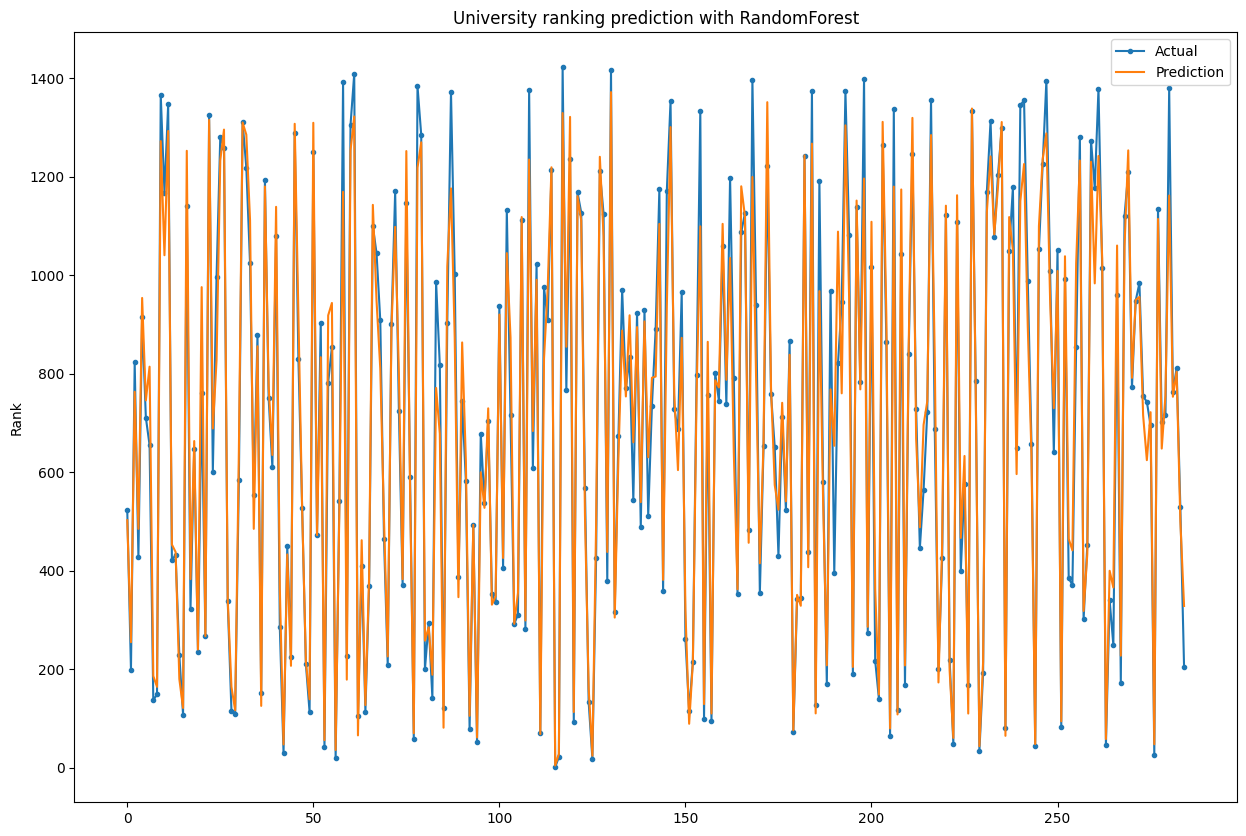

In [164]:
# Plotting actual vs predicted values
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with RandomForest')
plt.legend()
plt.show()

##### **Decision Tree Visualization**

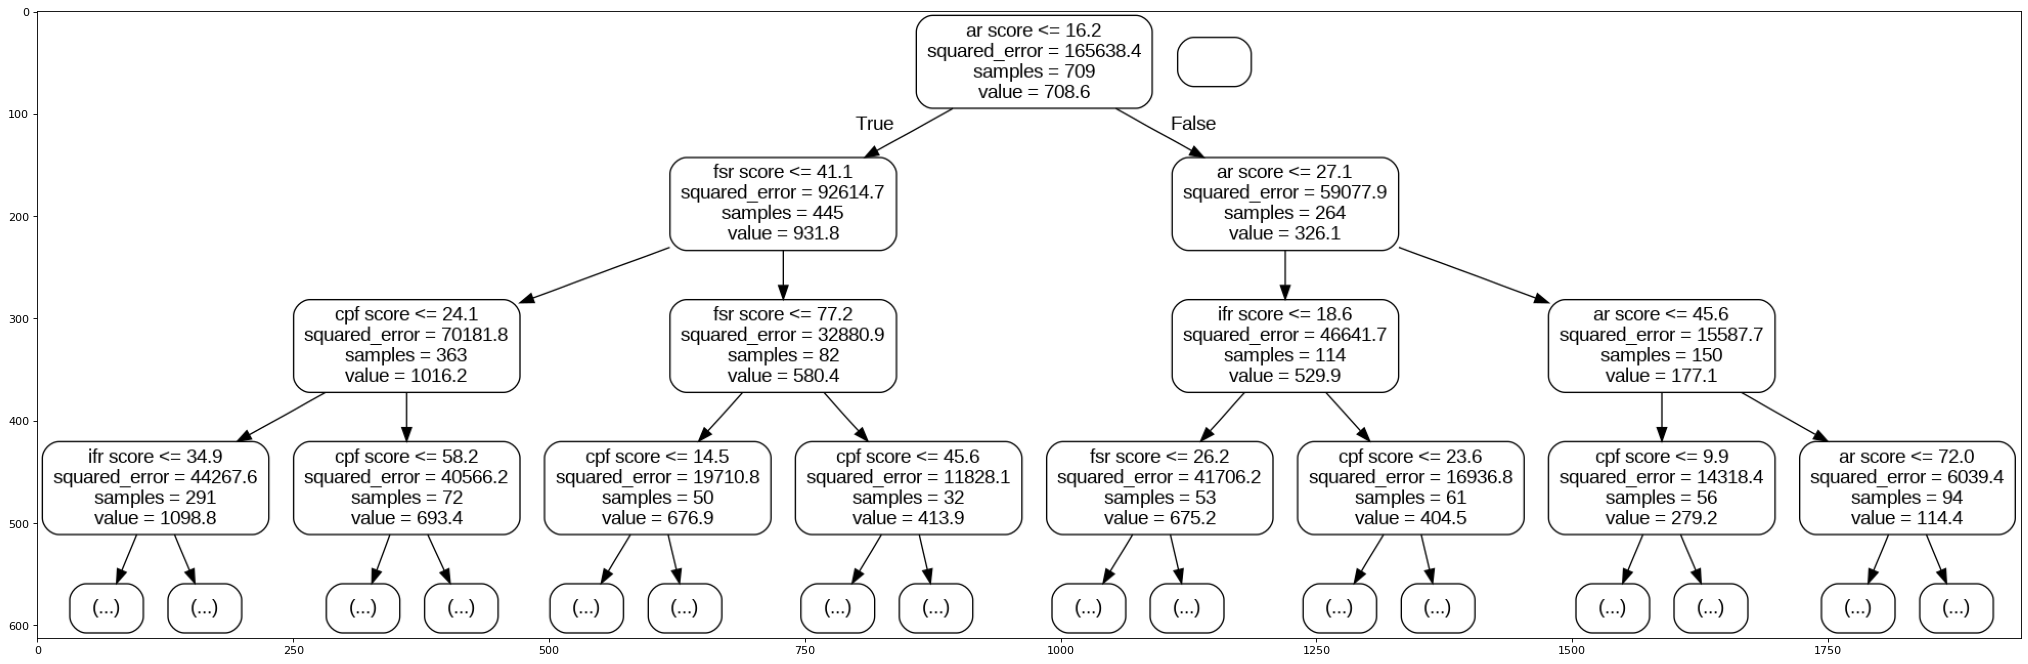

In [165]:
# Creating a decision tree visualization
from matplotlib.pyplot import figure
figure(figsize=(32, 24), dpi=80)
tree = rf.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
    max_depth=3 # added parameter
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

Random Forest Regressor works on the concept of the wisdom of the crowd. The above decision tree is one of the many trees involved in predicting the target variable. Each decision tree regression predicts a number as an output for a given input. Random forest regression takes the average of those predictions as its final output.

As usual, the tree has conditions on each internal node and a value associated with each leaf (i.e. the value to be predicted). But additionally, we’ve plotted out the value at each internal node i.e. the mean of the response variables in that region.

Let us try to understand how the above decision tree is working by interpreting the nodes starting from the extreme left side as leaf 1.

The decision tree visualization showed that the most important feature in predicting the ranking was the "fsr score", followed by "cpf score" and "er score", while the least important feature was "ger score".

##### **Tree-Based Model Interpretation**

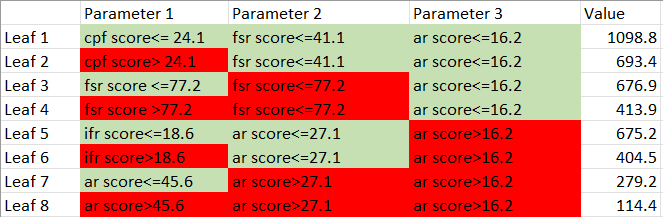

Please refer to the above figure to understand the nodes The first leaf gets gains from all parameters as the condition satisfied for all 3 parameters The second leaf gets gains from parameters 2, and 3 but not from parameters 1 And Similarly, the red marked cells are the losses incurred and Green marked cells are the gains incurred from the parameters which give us output as values for this specific decision tree

##### **Comparing the performance based on Actual vs Predicted values and Scores**

In [166]:
#Comparing all the values
prediction['RandomForest'] = y_pred.flatten()
prediction['RandomForest'] = prediction['RandomForest'].round(0)
prediction.head()

,Actual,Linear Regression,DecisionTree,RandomForest
0,524.0000,648.0000,407.0000,503.0000
1,199.0000,140.0000,280.0000,255.0000
2,823.0000,800.0000,803.0000,763.0000
3,428.0000,725.0000,327.0000,485.0000
4,915.0000,1132.0000,917.0000,954.0000


**As we can see, on comparing the predicted values for all 3 methods. Random Forest has given the values nearest to the actual values.**

In [167]:
#Comparing the scores of all 3 models
table = [["Model", "MSE", "RMSE", "MAE", "R^2"],
         ["Random Forest", rf_mse, rf_rmse, rf_mae, rf_r],
         ["Decision Tree", dt_mse, dt_rmse, dt_mae, dt_r],
         ["Linear Regression", lr_mse, lr_rmse, lr_mae, lr_r]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤══════════╤══════════╤══════════╤══════════╕
│ Model             │      MSE │     RMSE │      MAE │      R^2 │
╞═══════════════════╪══════════╪══════════╪══════════╪══════════╡
│ Random Forest     │  6700.58 │  81.8571 │  59.4218 │ 0.962468 │
├───────────────────┼──────────┼──────────┼──────────┼──────────┤
│ Decision Tree     │ 16288.1  │ 127.625  │  90.193  │ 0.908765 │
├───────────────────┼──────────┼──────────┼──────────┼──────────┤
│ Linear Regression │ 29967.2  │ 173.11   │ 143.343  │ 0.832145 │
╘═══════════════════╧══════════╧══════════╧══════════╧══════════╛


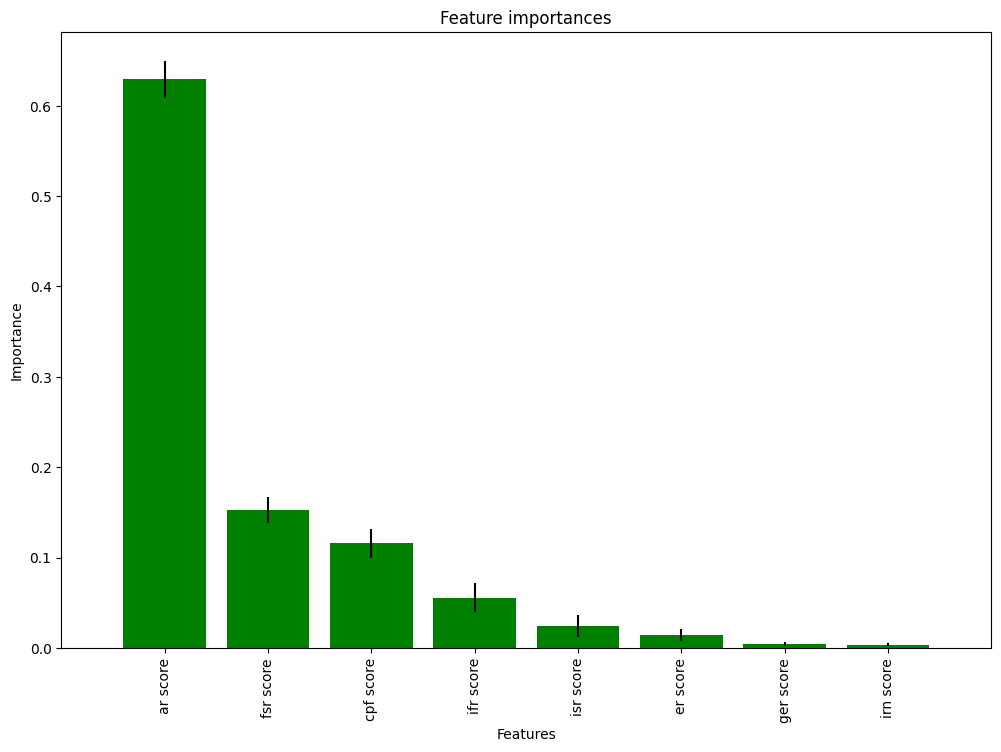

In [168]:
# Plotting the feature importance for random forest
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation='vertical')
plt.xlim([-1, x_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

#### **Inference from the above table**

- Random Forest has the lowest MSE, RMSE, and MAE values, indicating that it performs the best out of the three models in terms of accuracy.

- Decision Tree has higher MSE, RMSE, and MAE values than Random Forest, but still performs better than Linear Regression.

- Linear Regression has the highest MSE, RMSE, and MAE values, indicating that it is the least accurate of the three models.
All three models have positive R^2 values, indicating that they are a good fit for the data, but Random Forest has the highest R^2 value, indicating that it explains the most variance in the data. Overall, Random Forest seems to be the best performing model, followed by Decision Tree and Linear Regression.

### **SHAP Analysis**

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plots are

- SHAP feature importance for a linear model
- SHAP feature importance for tree-based model

As we can see below in the plots, there is a difference in feature importance for both the models

- For the linear model, fsr is the most important feature but,
- For our tree-based model ar is the most important feature when we consider the average of SHAP values to calculate feature importance.

#### **Interpreting Waterfall SHAP visualization**

**Linear Regression Model**
- It says that f(x) = 568.113 is what we got as a model output and the expected output for this sample was 990.961. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that er score has the most negative impact in decreasing the rank of university, for this specific sample. 

- Considering fsr score which had a positive impact and it bought the rank of university up for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 568.113.

**Tree-Based Model**
- Similarly we can interpret the tree-based model for the same sample.
Where the output we got was -226.708 and the expected output was 123.858. in the tree-based model, we just see that the magnitude of the impact made by individual features varies from what we had in a linear model. Here in the tree-based model, the output is equally determined by the features - The below graph shows that ar score has the most negative impact in decreasing the rank of university, for this specific sample..

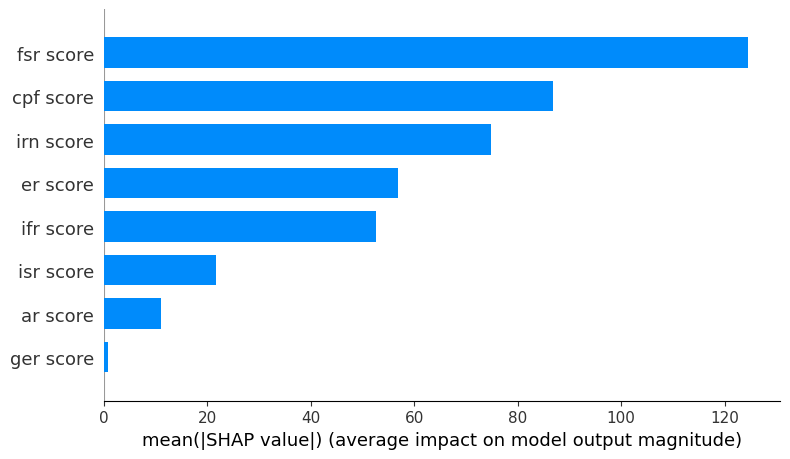

In [169]:
# Linear Regression Model
lr_shap_explainer = shap.LinearExplainer(lr, x_train, feature_dependence="independent")
lr_shap_values = lr_shap_explainer.shap_values(x_train)
shap.summary_plot(lr_shap_values, x_train, plot_type="bar")

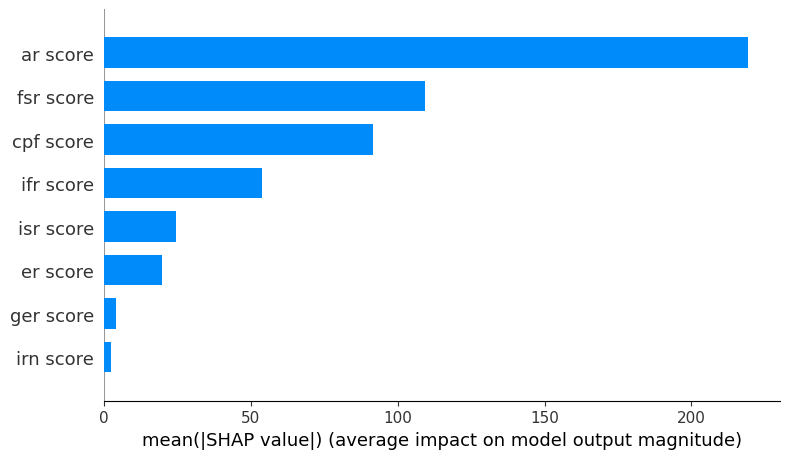

In [170]:
# Random Forest Model
rf_shap_explainer = shap.TreeExplainer(rf)
rf_shap_values = rf_shap_explainer.shap_values(x_train)
shap.summary_plot(rf_shap_values, x_train, plot_type="bar")


In [171]:
import shap

In [172]:
# Sample 100 examples for SHAP analysis
x_train_100 = shap.utils.sample(x_train, 100)
x_test_100 = shap.utils.sample(x_test, 100)


In [173]:
# Computing SHAP values using the linear regression model
lr_explainer = shap.Explainer(lr.predict, x_train_100)
lr_shap_values = lr_explainer(x_train)


Exact explainer: 1138it [00:11, 15.89it/s]                           


##### **Tree-Based Model**


Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of ar score

- For Tree-based model the cross is made at approx E[f(x)] 780

So as the ar score decreases the expected value also decreases or vice versa.

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

In [174]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(rf.predict, x_train_100)
tree_shap_values = tree_explainer(x_train)


Exact explainer: 1138it [03:38,  4.93it/s]


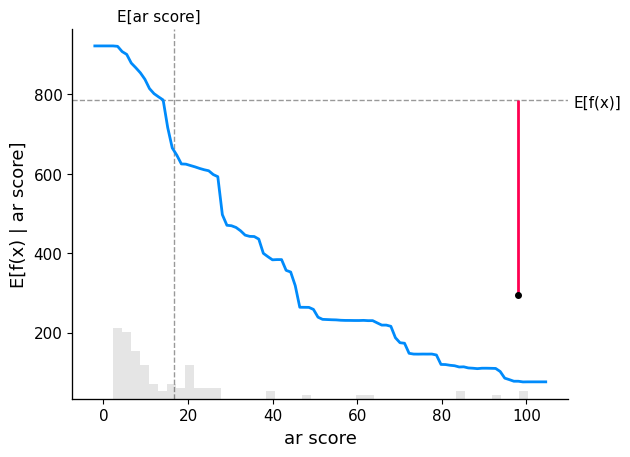

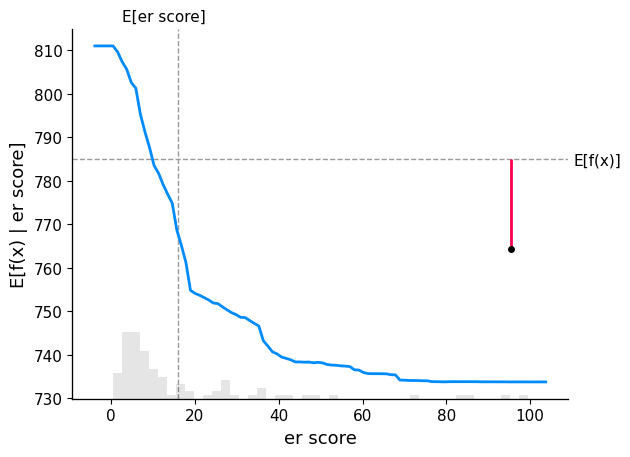

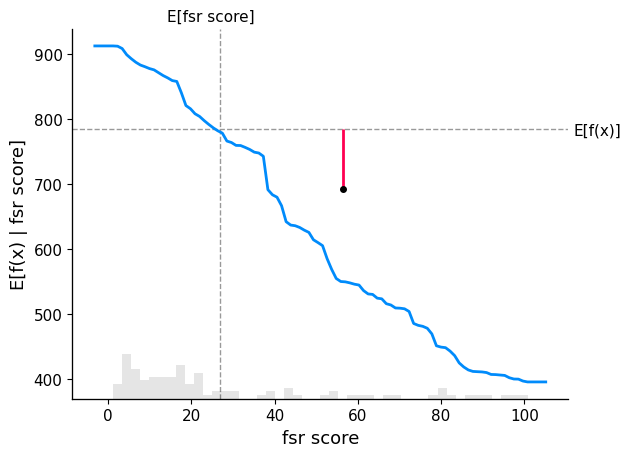

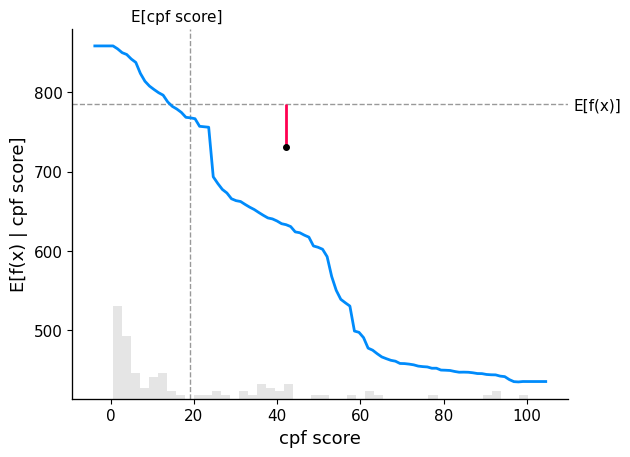

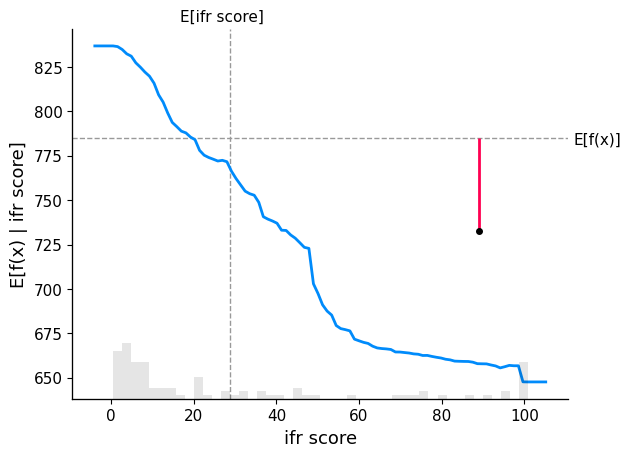

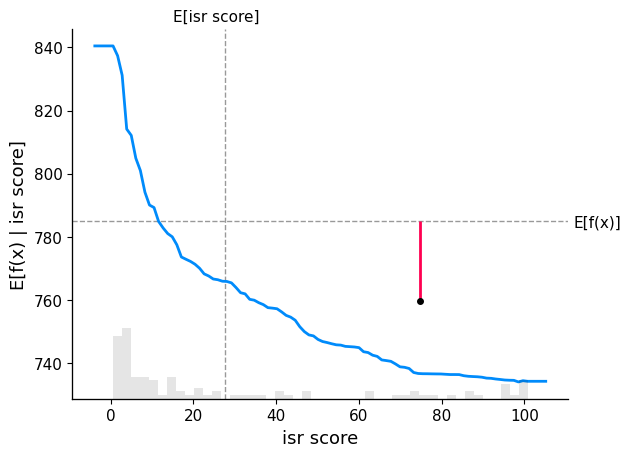

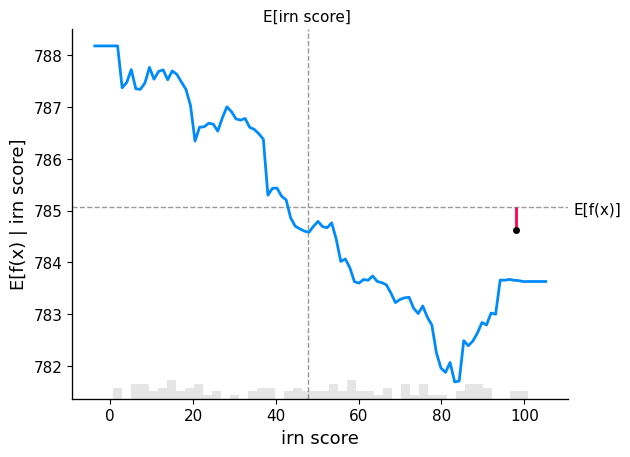

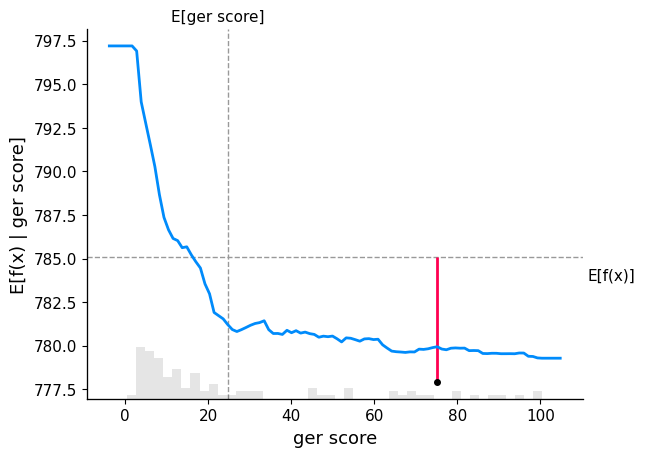

In [175]:
for i in x_train.columns:
    # making a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        rf.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

####**Interpret the summary plot for the Linear and Tree-based model**

Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

- Each dot(both red and blue) represents a feature of determination of rank.
- Red color represents high values whereas blue color represents low value
- If a dot(feature of determination of rank.) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
- The position of a dot(feature of determination of rank.) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.

Let us try to understand how both models are performing side by side

- Higher value of fsr tends to have a negatice impact on the rank of university
- Lower values of fsr score tend to have a positive impact on the rank of university.
- Lower value of irn tends to have a positive impact on the rank of university

We could also interpret the intensity of impact

- Higher amount of fsr score have a much negative impact on the rank of university but it doesn't really care if the value is low it will always have the same intensity of negative impact on the rank

This visualization is very useful when it comes to interpreting how our model is working.

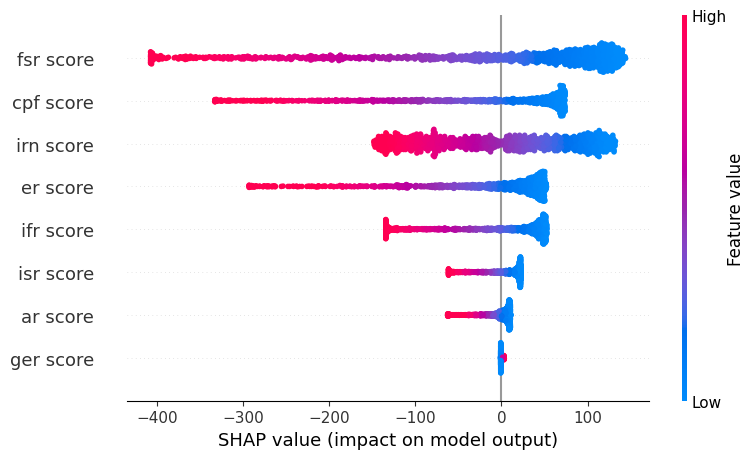

In [176]:
# SHAP summary for Linear Model
shap.summary_plot(lr_shap_values, x_train)
    

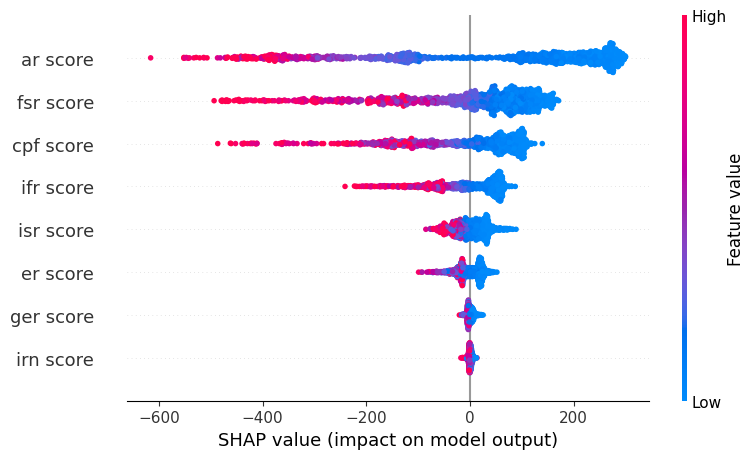

In [177]:
# SHAP summary for Tree-Based Model
shap.summary_plot(rf_shap_values, x_train)
    

### **Conclusion**
- Based on the evaluation metrics, the Random Forest model has an MSE of 6700.58, an RMSE of 81.8571, an MAE of 59.4218, and an R^2 of 0.962468. The Decision Tree model has an MSE of 16288.1, an RMSE of 127.625, an MAE of 90.193, and an R^2 of 0.908765. The Linear Regression model has an MSE of 29967.2, an RMSE of 173.11, an MAE of 143.343, and an R^2 of 0.832145. Therefore, the Random Forest model outperforms the other two models in terms of all three error metrics (MSE, RMSE, and MAE) and has the highest R^2 value, indicating the best performance in explaining the variance in the data. Overall, the Random Forest model appears to be the most accurate and reliable model for predicting the target variable.

- Higher value of fsr tends to have a negatice impact on the rank of university
- Lower values of fsr score tend to have a positive impact on the rank of university.
- Lower value of irn tends to have a positive impact on the rank of university

We could also interpret the intensity of impact

- Higher amount of fsr score have a much negative impact on the rank of university but it doesn't really care if the value is low it will always have the same intensity of negative impact on the rank



## **Dataset Example 2: Boston Housing Dataset**

### **Background:**

In this section of notebook I am trying to analyse which feature helps better influence the price of houses in the city of Boston. I am exploring the given dataset based on 13 key indicators.
The dataset include almost 506 datapoints.


#### **Data Definition**

**Dataset: https://raw.githubusercontent.com/shriyapandita06/shriyapandita06/main/boston%20housing.csv**

***Understanding the data:***

**Target Variables/Dependent Variables**
- MV: median value of owner-occupied homes in USD 1000s.

**Predictor variables/Independent Variables**
- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- NOX: nitric oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centres.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per USD 10,000.
- PT: pupil-teacher ratio by town.
- B: The proportion of blacks by town.
- LSTAT: lower status of the population (percent).

These are the 14 attributes or features of the Boston Housing dataset

##### **Importing necessary libraries**

In [178]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline

##### **Reading the Data**

In [179]:
df_bos=pd.read_csv("https://raw.githubusercontent.com/shriyapandita06/shriyapandita06/main/boston%20housing.csv") 
df_bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222,18.7000,394.6300,2.9400,33.4000
4,0.0690,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222,18.7000,396.9000,5.3300,36.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0000,11.9300,0,0.5730,6.5930,69.1000,2.4786,1,273,21.0000,391.9900,9.6700,22.4000
502,0.0453,0.0000,11.9300,0,0.5730,6.1200,76.7000,2.2875,1,273,21.0000,396.9000,9.0800,20.6000
503,0.0608,0.0000,11.9300,0,0.5730,6.9760,91.0000,2.1675,1,273,21.0000,396.9000,5.6400,23.9000
504,0.1096,0.0000,11.9300,0,0.5730,6.7940,89.3000,2.3889,1,273,21.0000,393.4500,6.4800,22.0000


##### **Understanding the Data**


In [180]:
df_bos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [192]:
# Checking for count of null values 
df_bos.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [194]:
## Summary Statistics
df_bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


#### **Correlation Analysis**

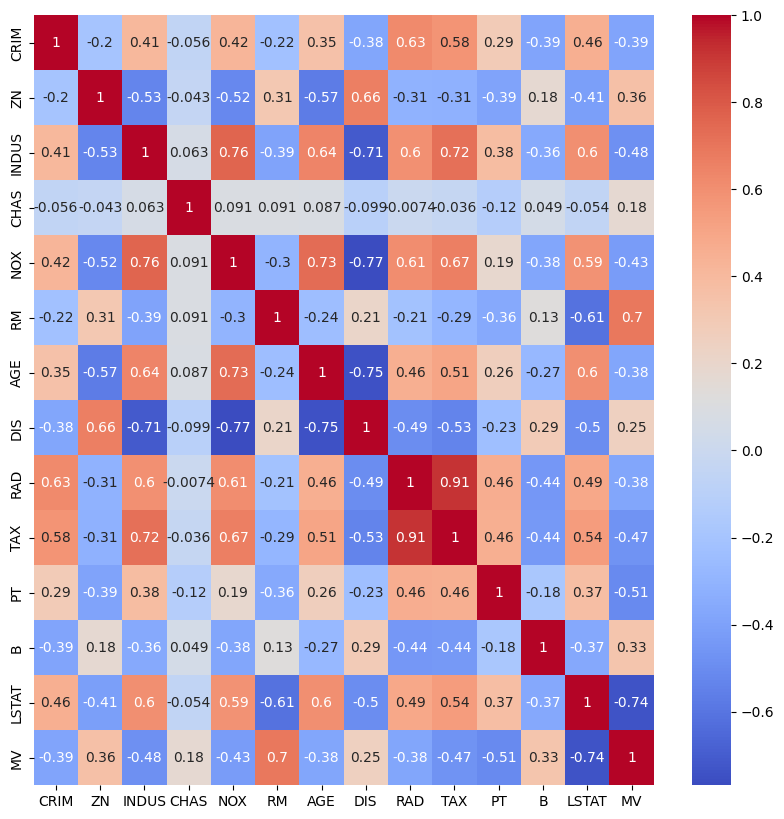

In [196]:
## Plotting the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_bos.corr(), cmap='coolwarm', annot=True, ax=ax)
plt.show()

##### **Interpretation of the above heatmap:**
- Rooms per dwelling (RM) and percentage of lower status (LSTAT) are strongly correlated with median home value (MEDV), indicating that these factors are important drivers of home values in the Boston Housing dataset.

- Other variables like crime rate (CRIM) and accessibility to highways (RAD) have weaker correlations with MEDV, suggesting that they may have less impact on home values in this area.

- Some variables in the dataset are highly correlated with each other, which can cause multicollinearity issues in regression models.






In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant 
X = add_constant(df_bos)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const   645.9779
TAX       9.2055
RAD       7.8082
NOX       4.5869
DIS       4.3960
INDUS     3.9925
MV        3.8557
LSTAT     3.5816
AGE       3.1008
ZN        2.3522
RM        2.2604
PT        1.9930
CRIM      1.8315
B         1.3815
CHAS      1.0952
dtype: float64

In [203]:
# Defining the independent and dependent variables
X = df_bos.drop("MV", axis=1)
y = df_bos["MV"]

In [204]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#### **Linear Regression**

In [205]:
# Creating a linear regression object
lr = LinearRegression()

# Fitting the linear regression model on the training set
lr.fit(X_train, y_train)

LinearRegression()

In [206]:
# Predicting the prices on the test set
y_pred = lr.predict(X_test)

# Printing the R-squared value of the model
print("R-squared:", lr.score(X_test, y_test))

R-squared: 0.7555033080079605


#### **Tree-based Model**

##### **Decision Tree**

In [208]:
# Creating a decision tree regression object
dt = DecisionTreeRegressor(random_state=100)

# Fitting the decision tree regression model on the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [209]:
# Predicting the prices on the test set
y_pred_dt = dt.predict(X_test)

# Printing the R-squared value of the model
print("R-squared:", dt.score(X_test, y_test))


R-squared: 0.8371793774137342


##### **Random Forest**

In [211]:
# Creating a random forest regression object
rf = RandomForestRegressor(random_state=100)

# Fitting the random forest regression model on the training set
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=100)

In [212]:
# Predicting the prices on the test set
y_pred_rf = rf.predict(X_test)

# Printing the R-squared value of the model
print("R-squared:", rf.score(X_test, y_test))

R-squared: 0.8926498070699457


#### **Evaluation of Performance - Scores**

##### **Linear Regression**

In [213]:
# Calculating the R-squared value of the linear regression model
lr_r2 = lr.score(X_test, y_test)

# Calculating the mean squared error of the linear regression model
lr_mse = np.mean((y_test - y_pred)**2)

# Calculating the mean absolute error of the linear regression model
lr_mae = np.mean(np.abs(y_test - y_pred))


##### **Decision Tree**

In [214]:
# Calculating the R-squared value of the decision tree regression model
dt_r2 = dt.score(X_test, y_test)

# Calculating the mean squared error of the decision tree regression model
dt_mse = np.mean((y_test - y_pred_dt)**2)

# Calculating the mean absolute error of the decision tree regression model
dt_mae = np.mean(np.abs(y_test - y_pred_dt))

##### **Random Forest**

In [215]:
# Calculating the R-squared value of the random forest regression model
rf_r2 = rf.score(X_test, y_test)

# Calculating the mean squared error of the random forest regression model
rf_mse = np.mean((y_test - y_pred_rf)**2)

# Calculating the mean absolute error of the random forest regression model
rf_mae = np.mean(np.abs(y_test - y_pred_rf))

In [216]:
#Comparing the scores of all 3 models
table = [["Model", "MSE", "MAE", "R^2"],
         ["Random Forest", rf_mse, rf_mae, rf_r2],
         ["Decision Tree", dt_mse, dt_mae, dt_r2],
         ["Linear Regression", lr_mse, lr_mae, lr_r2]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═════════╤═════════╤══════════╕
│ Model             │     MSE │     MAE │      R^2 │
╞═══════════════════╪═════════╪═════════╪══════════╡
│ Random Forest     │ 10.3694 │ 2.2815  │ 0.89265  │
├───────────────────┼─────────┼─────────┼──────────┤
│ Decision Tree     │ 15.7275 │ 2.95196 │ 0.837179 │
├───────────────────┼─────────┼─────────┼──────────┤
│ Linear Regression │ 23.617  │ 3.24848 │ 0.755503 │
╘═══════════════════╧═════════╧═════════╧══════════╛


#### **Performance Metrics Comparision**

In [217]:
# Setting the model names and performance metrics
models = ["Linear Regression", "Decision Tree", "Random Forest"]
r2_scores = [lr_r2, dt_r2, rf_r2]
mse_scores = [lr_mse, dt_mse, rf_mse]
mae_scores = [lr_mae, dt_mae, rf_mae]

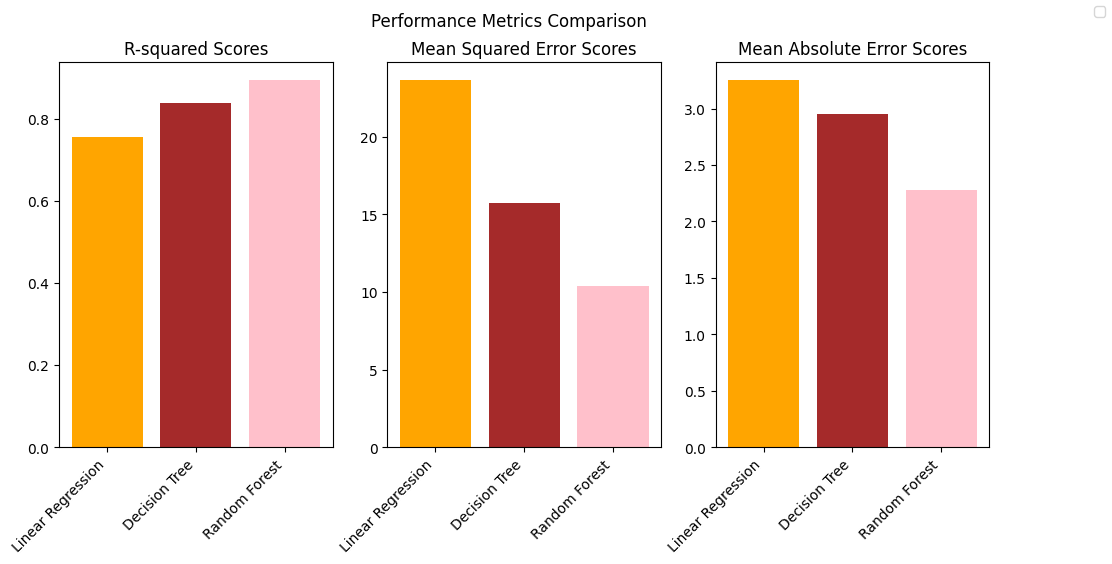

In [218]:
# Creating a figure with subplots for each metric
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Setting the x-axis and bar colors
x = np.arange(len(models))
bar_colors = ["orange", "brown", "pink"]

# Plotting the R-squared scores
axs[0].bar(x, r2_scores, color=bar_colors)
axs[0].set_xticks(x)
axs[0].set_xticklabels(models, rotation=45, ha="right")
axs[0].set_title("R-squared Scores")

# Plotting the Mean Squared Error scores
axs[1].bar(x, mse_scores, color=bar_colors)
axs[1].set_xticks(x)
axs[1].set_xticklabels(models, rotation=45, ha="right")
axs[1].set_title("Mean Squared Error Scores")

# Plotting the Mean Absolute Error scores
axs[2].bar(x, mae_scores, color=bar_colors)
axs[2].set_xticks(x)
axs[2].set_xticklabels(models, rotation=45, ha="right")
axs[2].set_title("Mean Absolute Error Scores")

# Adding a title and legend to the figure
fig.suptitle("Performance Metrics Comparison")
fig.legend(bar_colors, ["Linear Regression", "Decision Tree Regression", "Random Forest Regression"])

plt.show()


#### **SHAP Analysis**

- Linear Regression
- Tree-based Models

In [219]:
# Creating explainer objects for all three models
explainer_lr = shap.Explainer(lr, X_train)
explainer_dt = shap.Explainer(dt, X_train)
explainer_rf = shap.Explainer(rf, X_train)

# Calculating SHAP values for the test set for all three models
shap_values_lr = explainer_lr(X_test)
shap_values_dt = explainer_dt(X_test)
shap_values_rf = explainer_rf(X_test)

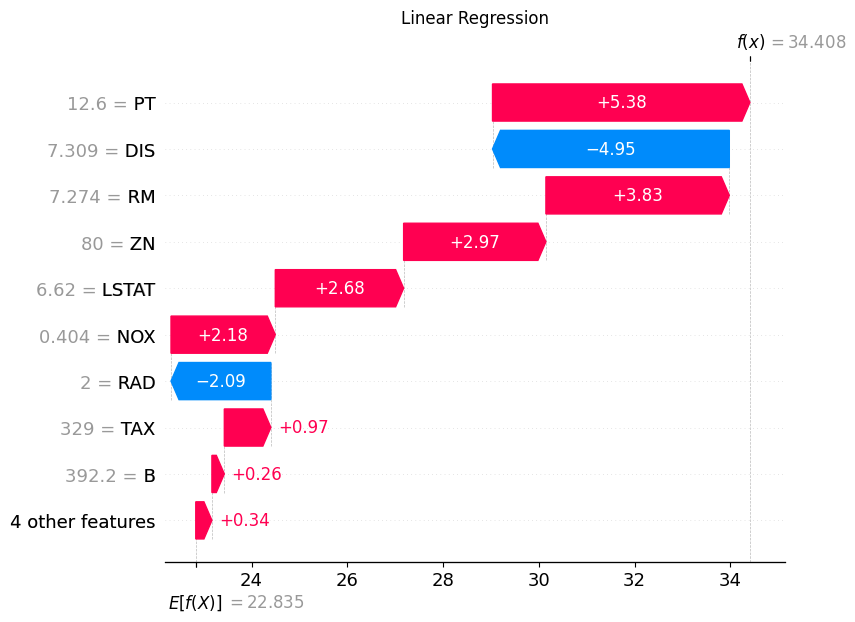

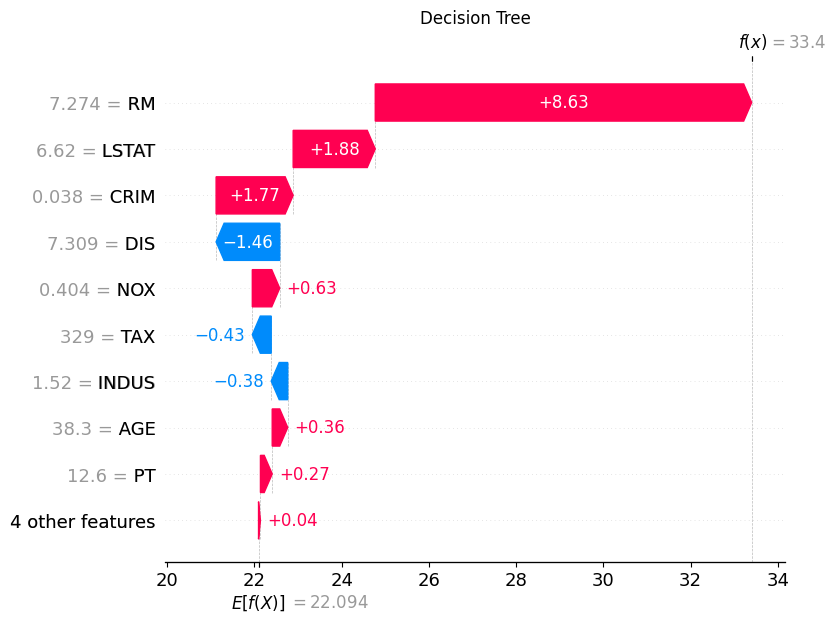

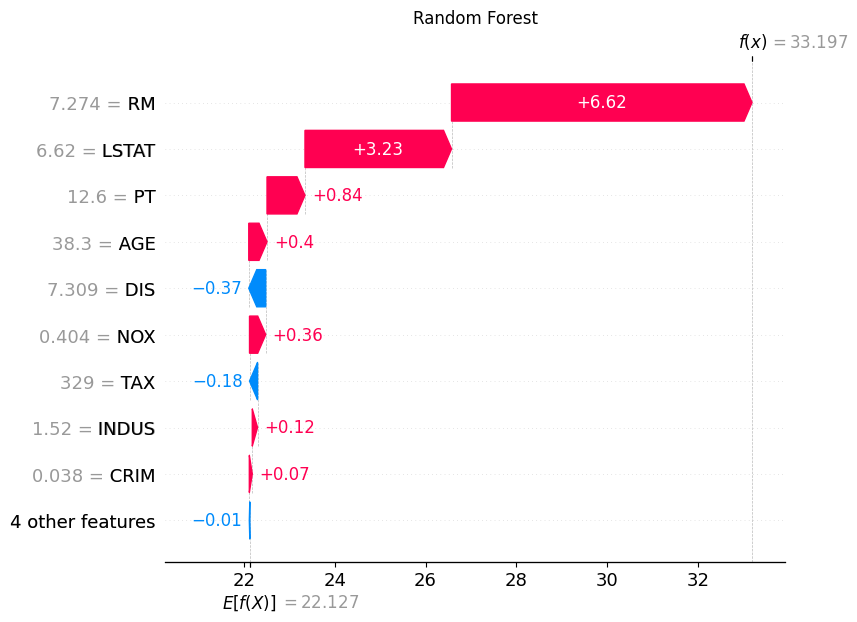

In [221]:
# Plotting the SHAP values for a single instance for all three models
shap.plots.waterfall(shap_values_lr[0], max_display=10, show=False)
plt.title("Linear Regression")
plt.show()

shap.plots.waterfall(shap_values_dt[0], max_display=10, show=False)
plt.title("Decision Tree")
plt.show()

shap.plots.waterfall(shap_values_rf[0], max_display=10, show=False)
plt.title("Random Forest")
plt.show()



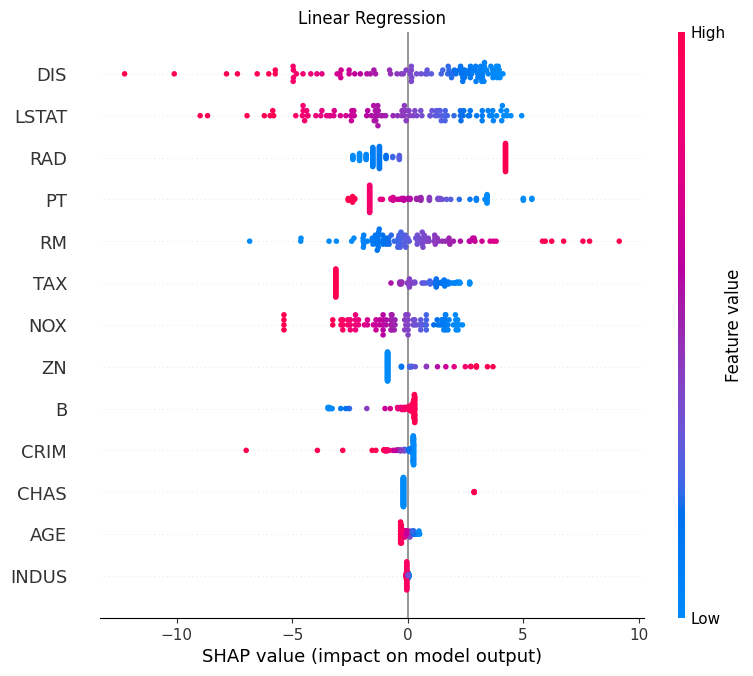

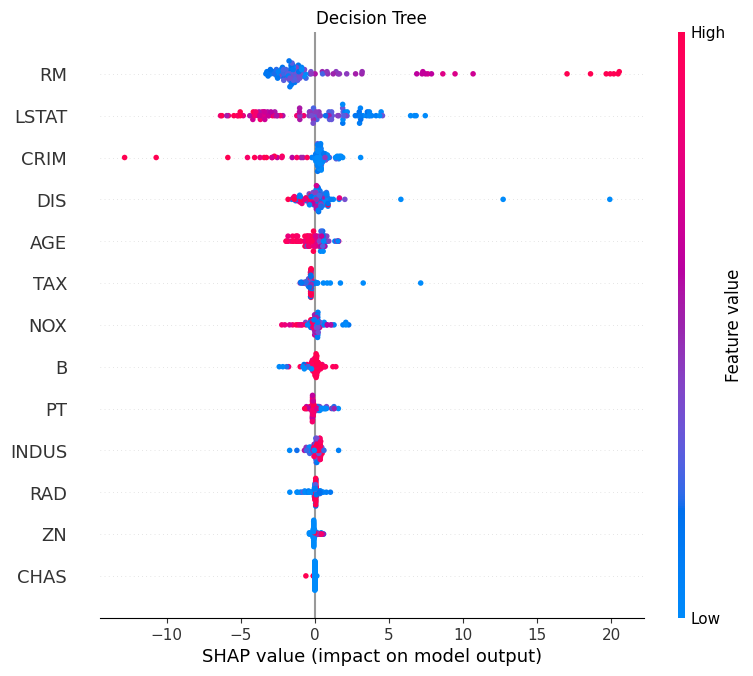

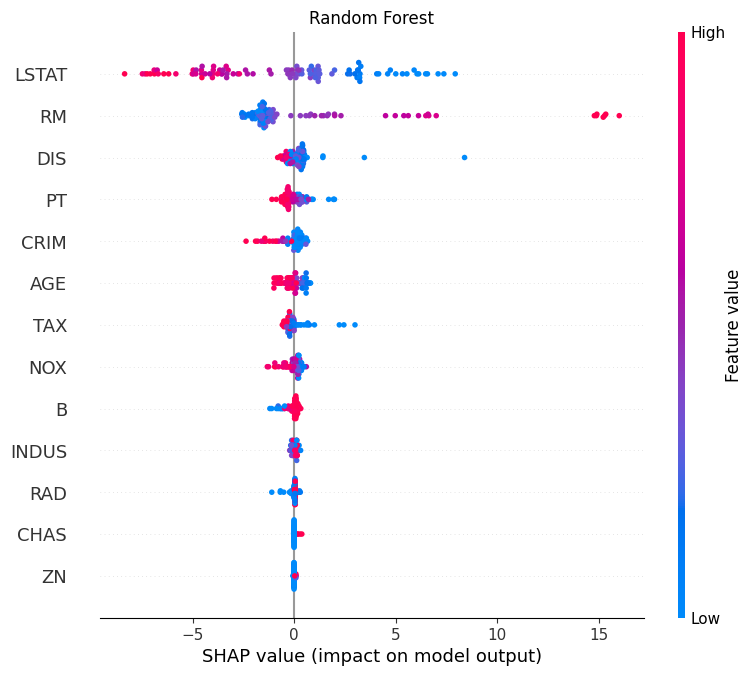

In [222]:
# Plotting the SHAP values for all instances in the test set for all three models
shap.summary_plot(shap_values_lr, X_test, show=False)
plt.title("Linear Regression")
plt.show()

shap.summary_plot(shap_values_dt, X_test, show=False)
plt.title("Decision Tree")
plt.show()

shap.summary_plot(shap_values_rf, X_test, show=False)
plt.title("Random Forest")
plt.show()

##### **Interpretation of the SHAP Analysis**
- Shap analysis was performed on the Boston Housing dataset using both linear regression and tree-based models. The goal was to understand the importance of the different features in predicting the median value of owner-occupied homes.

- In the linear regression model, the most important features were found to be the number of rooms per dwelling (RM), the percentage of lower status of the population (LSTAT), and the weighted distances to five Boston employment centers (DIS). These three features had a positive impact on the target variable, meaning that as they increased, the median value of homes also increased.

- On the other hand, in the tree-based model, the most important features were found to be the percentage of lower status of the population (LSTAT), the average number of rooms per dwelling (RM), and the pupil-teacher ratio by town (PT). These three features had a negative impact on the target variable, meaning that as they increased, the median value of homes decreased.

- In conclusion, both models agreed on the importance of the number of rooms per dwelling (RM) and the percentage of lower status of the population (LSTAT), but differed in the importance of the third feature. The linear regression model found that the weighted distances to five Boston employment centers (DIS) was important, while the tree-based model found that the pupil-teacher ratio by town (PT) was important. The Shap analysis helped identify the key features driving the predictions in each model, providing insights that can be used to improve their performance or inform policy decisions.








### **Conclusion**
- SHAP Analysis was performed on the Boston Housing dataset using both linear regression and tree-based models. The aim was to understand the importance of different features in predicting the median value of owner-occupied homes. The analysis revealed that the number of rooms per dwelling (RM) and the percentage of lower status of the population (LSTAT) were consistently important features in both models. However, the third most important feature differed between the two models. In the linear regression model, the weighted distances to five Boston employment centers (DIS) was important, while in the tree-based model, the pupil-teacher ratio by town (PT) was important.

- In terms of model performance, the Random Forest model had the lowest Mean Squared Error (MSE), the lowest Mean Absolute Error (MAE), and the highest R^2 score among the three models, indicating it had the best predictive power. The Decision Tree model had a slightly higher MSE and MAE than the Random Forest model but still outperformed the Linear Regression model. The Linear Regression model had the highest MSE and MAE and the lowest R^2 score among the three models, indicating it had the weakest predictive power.

- Overall, the SHAP analysis helped identify the key features driving the predictions in each model, providing insights that can be used to improve their performance or inform policy decisions. Among the models, the tree-based models performed better than the linear regression model on this dataset.

# **Licences:**

Copyright (c) 2023 Shriya Pandita

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References:**

Shap official documentation: https://shap.readthedocs.io/en/latest/index.html

Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html

Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html

sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

QS University World Ranking dataset - https://www.kaggle.com/datasets/jkanthony/world-university-rankings-202223

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/